In [3]:
import json
transactions = []
with open("transactions", "r") as fp:
    transactions = json.load(fp)

In [4]:
transactions

[['burgers',
  'meatballs',
  'eggs',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['chutney',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['turkey',
  'avocado',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['mineral water',
  'milk',
  'energy bar',
  'whole wheat rice',
  'green tea',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['low fat yogurt',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['whole wheat pasta',
  

In [40]:
from apyori import apriori
from pyECLAT import ECLAT
from fpgrowth_py import fpgrowth

import numpy as np

import time
import memory_profiler as mp
import pandas as pd

times = [[], [], []]

eclat = ECLAT(pd.DataFrame(transactions))
transesForFp = [list(filter(lambda x: x != 'nan', it)) for it in transactions]

x = []
for i in np.arange(0.01, 0.51, 0.01):
    print(i)
    x.append(i)

    start = time.time()
    apriori(transactions=transactions, min_support=i, min_confidence=0.2, min_lift=3, min_length=2, max_length=2)
    end = time.time() - start
    times[0].append(end)


    start = time.time()
    eclat.fit(min_support=i, min_combination=2, max_combination=2)
    end = time.time() - start
    times[1].append(end)

    start = time.time()
    fpgrowth(transesForFp, minSupRatio=i, minConf=0.2)
    end = time.time() - start
    times[2].append(end)

memoryUsage = [[], [], []]

for i in np.arange(0.01, 0.51, 0.01):
    
    memoryUsage[0].append(
        mp.memory_usage((apriori, (transactions,), { 'min_support':i, 'min_confidence':0.2, 'min_lift':3, 'min_length':2, 'max_length':2 }), max_usage=True)
    )

    memoryUsage[1].append(
        mp.memory_usage((eclat.fit, (), {'min_support':i, 'min_combination':2, 'max_combination':2}), max_usage=True)
    )

    memoryUsage[2].append(
        mp.memory_usage((fpgrowth, (transesForFp, i, 0.2)), max_usage=True)
    )


0.01
Combination 2 by 2


2775it [00:05, 548.73it/s]


0.02
Combination 2 by 2


1378it [00:02, 536.91it/s]


0.03
Combination 2 by 2


630it [00:01, 539.45it/s]


0.04
Combination 2 by 2


435it [00:00, 549.45it/s]


0.05
Combination 2 by 2


300it [00:00, 539.15it/s]


0.060000000000000005
Combination 2 by 2


190it [00:00, 543.45it/s]


0.06999999999999999
Combination 2 by 2


120it [00:00, 526.75it/s]


0.08
Combination 2 by 2


78it [00:00, 512.81it/s]


0.09
Combination 2 by 2


45it [00:00, 497.91it/s]


0.09999999999999999
Combination 2 by 2


21it [00:00, 436.16it/s]


0.11
Combination 2 by 2


21it [00:00, 470.64it/s]


0.12
Combination 2 by 2


21it [00:00, 452.03it/s]


0.13
Combination 2 by 2


15it [00:00, 464.22it/s]

0.14


Combination 2 by 2


10it [00:00, 455.38it/s]


0.15000000000000002
Combination 2 by 2


10it [00:00, 473.48it/s]


0.16
Combination 2 by 2


10it [00:00, 477.18it/s]


0.17
Combination 2 by 2


6it [00:00, 474.04it/s]


0.18000000000000002
Combination 2 by 2


0it [00:00, ?it/s]


0.19
Combination 2 by 2


0it [00:00, ?it/s]


0.2
Combination 2 by 2


0it [00:00, ?it/s]

0.21000000000000002


Combination 2 by 2


0it [00:00, ?it/s]


0.22
Combination 2 by 2


0it [00:00, ?it/s]


0.23
Combination 2 by 2


0it [00:00, ?it/s]


0.24000000000000002
Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
0.25
Combination 2 by 2


0it [00:00, ?it/s]

No frequent item set
0.26


Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
0.27
Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
0.28
Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
0.29000000000000004
Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
0.3
Combination 2 by 2


0it [00:00, ?it/s]

No frequent item set
0.31


Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
0.32
Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
0.33
Combination 2 by 2


0it [00:00, ?it/s]

No frequent item set
0.34


Combination 2 by 2


0it [00:00, ?it/s]

No frequent item set
0.35000000000000003


Combination 2 by 2


0it [00:00, ?it/s]

No frequent item set
0.36000000000000004


Combination 2 by 2


0it [00:00, ?it/s]

No frequent item set
0.37


Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
0.38
Combination 2 by 2


0it [00:00, ?it/s]

No frequent item set
0.39


Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
0.4
Combination 2 by 2


0it [00:00, ?it/s]

No frequent item set
0.41000000000000003


Combination 2 by 2


0it [00:00, ?it/s]

No frequent item set
0.42000000000000004


Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
0.43
Combination 2 by 2


0it [00:00, ?it/s]

No frequent item set
0.44


Combination 2 by 2


0it [00:00, ?it/s]

No frequent item set


0.45
Combination 2 by 2


0it [00:00, ?it/s]

No frequent item set
0.46


Combination 2 by 2


0it [00:00, ?it/s]

No frequent item set
0.47000000000000003


Combination 2 by 2


0it [00:00, ?it/s]

No frequent item set
0.48000000000000004


Combination 2 by 2


0it [00:00, ?it/s]

No frequent item set
0.49


Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
0.5
Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
Combination 2 by 2


2775it [00:04, 561.30it/s]


Combination 2 by 2


1378it [00:02, 570.84it/s]


Combination 2 by 2


630it [00:01, 561.96it/s]


Combination 2 by 2


435it [00:00, 555.93it/s]


Combination 2 by 2


300it [00:00, 567.27it/s]


Combination 2 by 2


190it [00:00, 524.66it/s]


Combination 2 by 2


120it [00:00, 528.19it/s]


Combination 2 by 2


78it [00:00, 512.80it/s]


Combination 2 by 2


78it [00:00, 516.67it/s]


Combination 2 by 2


45it [00:00, 518.14it/s]


Combination 2 by 2


45it [00:00, 495.61it/s]


Combination 2 by 2


21it [00:00, 458.49it/s]


Combination 2 by 2


21it [00:00, 487.30it/s]


Combination 2 by 2


21it [00:00, 478.49it/s]


Combination 2 by 2


21it [00:00, 454.58it/s]


Combination 2 by 2


21it [00:00, 453.80it/s]


Combination 2 by 2


21it [00:00, 471.52it/s]


Combination 2 by 2


15it [00:00, 450.06it/s]


Combination 2 by 2


15it [00:00, 447.74it/s]


Combination 2 by 2


10it [00:00, 447.66it/s]


Combination 2 by 2


10it [00:00, 456.31it/s]


Combination 2 by 2


10it [00:00, 449.84it/s]


Combination 2 by 2


10it [00:00, 449.52it/s]


Combination 2 by 2


10it [00:00, 484.10it/s]


Combination 2 by 2


10it [00:00, 437.33it/s]


Combination 2 by 2


6it [00:00, 474.27it/s]


Combination 2 by 2


6it [00:00, 443.22it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
No frequent item set
No frequent item set
Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
No frequent item set
No frequent item set
Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
No frequent item set
No frequent item set
Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
No frequent item set
No frequent item set
Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
No frequent item set
No frequent item set
Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
No frequent item set
No frequent item set
Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
No frequent item set
No frequent item set
Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
No frequent item set
No frequent item set
Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
No frequent item set
No frequent item set
Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
No frequent item set
No frequent item set
Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
No frequent item set
No frequent item set
Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
No frequent item set
No frequent item set
Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
No frequent item set
No frequent item set
Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
No frequent item set
No frequent item set
Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
No frequent item set
No frequent item set
Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
No frequent item set
No frequent item set
Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
No frequent item set
No frequent item set
Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
No frequent item set
No frequent item set
Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
No frequent item set
No frequent item set
Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
No frequent item set
No frequent item set
Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
No frequent item set
No frequent item set
Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
No frequent item set
No frequent item set
Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
No frequent item set
No frequent item set
Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
No frequent item set
No frequent item set
Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
No frequent item set
No frequent item set
Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
No frequent item set
No frequent item set
Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
No frequent item set
No frequent item set


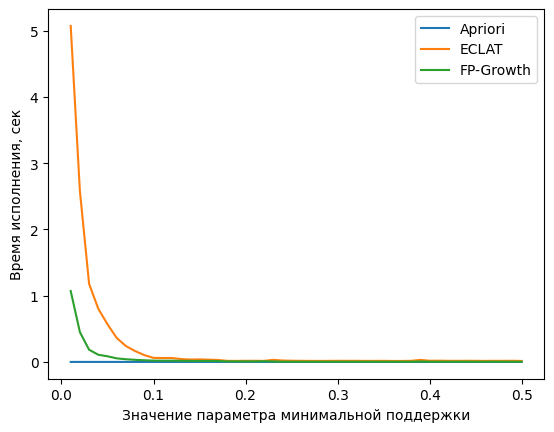

In [41]:
import matplotlib.pyplot as plt

plt.plot(x, times[0], label="Apriori")
plt.plot(x, times[1], label="ECLAT")
plt.plot(x, times[2], label="FP-Growth")
plt.legend()
plt.ylabel("Время исполнения, сек")
plt.xlabel("Значение параметра минимальной поддержки")
plt.show()

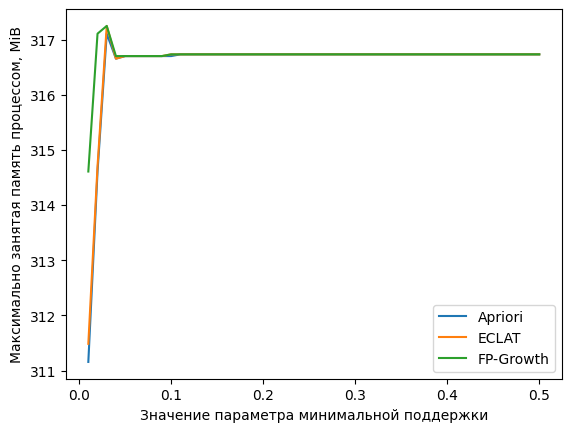

In [42]:
plt.plot(x, memoryUsage[0], label="Apriori")
plt.plot(x, memoryUsage[1], label="ECLAT")
plt.plot(x, memoryUsage[2], label="FP-Growth")
plt.legend()
plt.ylabel("Максимально занятая память процессом, MiB")
plt.xlabel("Значение параметра минимальной поддержки")
plt.show()